1. **World Map from Random Points using Geopackage and Rasterio**
( download world geopackage e.g. here:https://github.com/qgis/QGIS/blob/master/resources/data/world_map.gpkg)


2. **Asia Map from Contour Countries merge using Geopackage and Rasterio**


3. **Elevation Asia map using iris data cubes and .nc file**
( download .nc file e.g. here: http://research.jisao.washington.edu/datasets/elevation/ )


---------------------------------------------
**GeoTIFF** (Geographic Tagged Image File Format) - is a standard file format that combines a raster image with geographic information.


**GPKG** - Projects often start by importing an existing vector layer saved as a GeoPackage (.gpkg) file, an ESRI Shapefile (.shp), or other geographic file format. The function gpd.read_file imports a GeoPackage file named world.gpkg located in the data directory of Python’s working directory into a GeoDataFrame named gdf.


**.nc** - 0.5-degree latitude-longitude resolution elevation (TBASE) - elevation file


https://py.geocompx.org/08-mapping


https://github.com/qgis/QGIS/blob/master/resources/data/world_map.gpkg


https://py.geocompx.org/03-spatial-operations


http://research.jisao.washington.edu/datasets/elevation/





In [44]:
pip install matplotlib rasterio shapely geopandas cartopy scitools-iris

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import math
pd.set_option('display.max_colwidth', 200)
%matplotlib inline
from pandas import read_excel
import shapely
import geopandas as gpd
import os
import scipy.ndimage
import scipy.stats
import shapely
import rasterio
import rasterio.plot
import rasterio.merge
import rasterio.features
import iris

In [10]:
pd.set_option('display.max_rows', 6)

In [11]:
# 1. generate a map from random world geopackage points

In [12]:
world = gpd.read_file('world.gpkg')

/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'world.gpkg': 'states_provinces' (default), 'countries', 'disputed_borders', 'layer_styles'. Specify layer parameter to avoid this warning.
  result = read_func(


In [13]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [14]:
np.random.seed(11)       ## set seed for reproducibility
bb = world.total_bounds  ## the world's bounds
x = np.random.uniform(low=bb[0], high=bb[2], size=10)
y = np.random.uniform(low=bb[1], high=bb[3], size=10)
random_points = gpd.points_from_xy(x, y, crs=4326)
random_points = gpd.GeoDataFrame({'geometry': random_points})
random_points

,geometry
0,POINT (-115.03897 36.77373)
1,POINT (-172.89281 -71.03058)
2,POINT (-13.23397 65.22286)
...,...
7,POINT (-4.5437 -69.6421)
8,POINT (158.96203 -34.99948)
9,POINT (126.21607 -62.49683)


In [15]:
world_random = world[world.intersects(random_points.union_all())]
world_random

,iso_a2,name,fips,woe_label,woe_name,sov_a3,adm0_a3,admin,gu_a3,gn_name,geometry
1264,AQ,Antarctica,None,None,Antarctica,ATA,ATA,Antarctica,ATA,Antarctica (general),"MULTIPOLYGON (((167.34498 -77.66692, 167.25766 -77.71592, 166.66481 -77.85784, 166.61451 -77.83636, 166.6517 -77.80901, 166.89064 -77.7125, 166.45338 -77.71006, 166.89568 -77.67571, 166.38868 -77...."
2384,ML,Timbuktu,ML08,"Tombouctou, ML, Mali",Timbuktu,MLI,MLI,Mali,MLI,Tombouctou Region,"MULTIPOLYGON (((-0.50034 15.07972, -0.71972 15.07846, -0.77127 15.05662, -1.21403 15.17894, -1.38601 15.32196, -1.49505 15.37495, -1.68604 15.43094, -1.98902 15.42795, -2.14702 15.40694, -2.45005 ..."
3797,RU,Tomsk,RS75,"Tomskaya Oblast, RU, Russia",Tomsk,RUS,RUS,Russia,RUS,Tomskaya Oblast',"MULTIPOLYGON (((75.10521 58.58102, 75.15751 58.61821, 75.15947 58.65022, 75.16071 58.67766, 75.37321 58.78587, 75.64162 58.9824, 75.68688 59.04007, 75.62839 59.23778, 75.81866 59.29452, 75.89514 5..."
4331,US,Nevada,US32,"Nevada, US, United States",Nevada,US1,USA,United States of America,USA,Nevada,"MULTIPOLYGON (((-117.01662 41.99954, -114.04255 42.00008, -114.04196 40.75083, -114.04138 39.50159, -114.04081 38.25235, -114.0402 37.00313, -114.04284 36.21031, -114.08417 36.15757, -114.1239 36...."


In [16]:
random_joined = random_points.sjoin(world, how='left')
random_joined

,geometry,index_right,iso_a2,name,fips,woe_label,woe_name,sov_a3,adm0_a3,admin,gu_a3,gn_name
0,POINT (-115.03897 36.77373),4331.0,US,Nevada,US32,"Nevada, US, United States",Nevada,US1,USA,United States of America,USA,Nevada
1,POINT (-172.89281 -71.03058),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (-13.23397 65.22286),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7,POINT (-4.5437 -69.6421),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,POINT (158.96203 -34.99948),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,POINT (126.21607 -62.49683),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


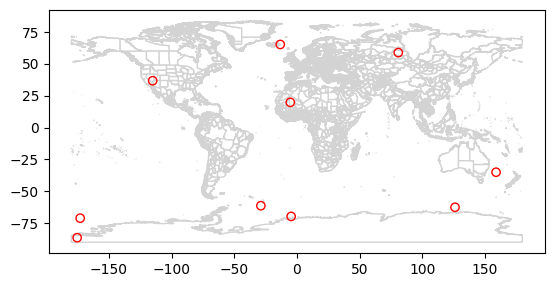

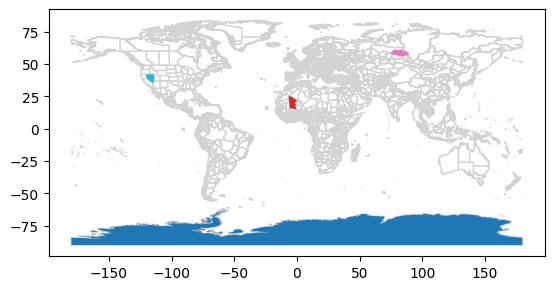

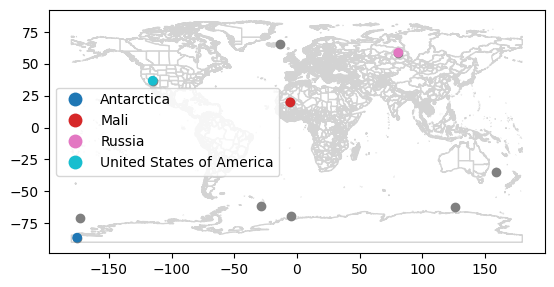

In [17]:
# Random points
base = world.plot(color='white', edgecolor='lightgrey')
random_points.plot(ax=base, color='None', edgecolor='red');
# World countries intersecting with the points
base = world.plot(color='white', edgecolor='lightgrey')
world_random.plot(ax=base, column='admin');
# Points with joined country names
base = world.plot(color='white', edgecolor='lightgrey')
random_joined.geometry.plot(ax=base, color='grey')
random_joined.plot(ax=base, column='admin', legend=True);

In [ ]:
# 2. generate China tif

In [18]:
China = world[world['admin'] == 'China']
China

,iso_a2,name,fips,woe_label,woe_name,sov_a3,adm0_a3,admin,gu_a3,gn_name,geometry
36,CN,Shandong,CH25,"Shandong, CN, China",Shandong,CH1,CHN,China,CHN,Shandong Sheng,"MULTIPOLYGON (((120.74838 37.93871, 120.75457 37.89667, 120.72633 37.90884, 120.72706 37.94766, 120.74838 37.93871)), ((120.60678 37.97989, 120.62582 37.97256, 120.62289 37.9488, 120.60678 37.9798..."
88,CN,Paracel Islands,PF,None,Paracel Islands,CH1,CHN,China,PFA,None,"MULTIPOLYGON (((111.19654 15.77538, 111.1941 15.77611, 111.19288 15.77823, 111.1963 15.78571, 111.19939 15.78921, 111.20753 15.78929, 111.20851 15.78628, 111.20753 15.78217, 111.2046 15.77924, 111..."
1086,CN,Guangxi,CH16,"Guangxi, CN, China",Guangxi,CH1,CHN,China,CHN,Guangxi Zhuangzu Zizhiqu,"MULTIPOLYGON (((109.10092 21.02119, 109.09051 21.04194, 109.09986 21.0607, 109.12273 21.06542, 109.13624 21.05101, 109.1277 21.03217, 109.10092 21.02119)), ((109.74806 21.57494, 109.74806 21.57461..."
...,...,...,...,...,...,...,...,...,...,...,...
4449,CN,Shanxi,CH24,"Shanxi, CN, China",Shanxi,CH1,CHN,China,CHN,Shanxi Sheng,"MULTIPOLYGON (((114.1541 40.74258, 114.15627 40.66387, 114.25621 40.55747, 114.29512 40.36679, 114.44824 40.35888, 114.50415 40.3425, 114.51066 40.32498, 114.45031 40.29377, 114.09963 40.19682, 11..."
4450,CN,Jiangxi,CH03,"Jiangxi, CN, China",Jiangxi,CH1,CHN,China,CHN,Jiangxi Sheng,"MULTIPOLYGON (((115.88753 24.91677, 115.90345 24.87163, 115.81131 24.87259, 115.77808 24.85406, 115.75498 24.8196, 115.74956 24.74234, 115.78201 24.691, 115.79038 24.56127, 115.69152 24.54799, 115..."
4451,CN,Henan,CH09,"Henan, CN, China",Henan,CH1,CHN,China,CHN,Henan Sheng,"MULTIPOLYGON (((113.72105 36.35587, 113.80828 36.33938, 113.86729 36.3653, 113.90714 36.34414, 113.9893 36.35902, 114.07353 36.27161, 114.19316 36.24094, 114.24562 36.2528, 114.34308 36.24471, 114..."


In [19]:
sel_CN = world.intersects(China.geometry.iloc[0])
sel_CN

,0
0,False
1,False
2,False
...,...
4553,False
4554,False
4555,False


In [20]:
China_height = world[sel_CN]
China_height

,iso_a2,name,fips,woe_label,woe_name,sov_a3,adm0_a3,admin,gu_a3,gn_name,geometry
36,CN,Shandong,CH25,"Shandong, CN, China",Shandong,CH1,CHN,China,CHN,Shandong Sheng,"MULTIPOLYGON (((120.74838 37.93871, 120.75457 37.89667, 120.72633 37.90884, 120.72706 37.94766, 120.74838 37.93871)), ((120.60678 37.97989, 120.62582 37.97256, 120.62289 37.9488, 120.60678 37.9798..."
1364,CN,Jiangsu,CH04,"Jiangsu, CN, China",Jiangsu,CH1,CHN,China,CHN,Jiangsu Sheng,"MULTIPOLYGON (((119.88071 32.12519, 119.90187 32.07339, 119.792 32.12177, 119.79103 32.16547, 119.81935 32.20376, 119.74985 32.22801, 119.71616 32.27265, 119.75082 32.29312, 119.8143 32.27558, 119..."
1394,CN,Hebei,CH10,"Hebei, CN, China",Hebei,CH1,CHN,China,CHN,Hebei Sheng,"MULTIPOLYGON (((117.23908 40.09262, 117.14844 39.95575, 117.17965 39.8794, 117.26311 39.85124, 117.1843 39.80878, 117.2029 39.7616, 117.16942 39.62725, 117.12218 39.618, 116.87564 39.68647, 116.87..."
3593,CN,Anhui,CH01,"Anhui, CN, China",Anhui,CH1,CHN,China,CHN,Anhui Sheng,"MULTIPOLYGON (((116.15129 34.56673, 116.19397 34.58435, 116.24332 34.56833, 116.37722 34.63954, 116.42812 34.63969, 116.59803 34.49477, 116.76954 34.45183, 116.8145 34.39209, 116.92142 34.40069, 1..."
4451,CN,Henan,CH09,"Henan, CN, China",Henan,CH1,CHN,China,CHN,Henan Sheng,"MULTIPOLYGON (((113.72105 36.35587, 113.80828 36.33938, 113.86729 36.3653, 113.90714 36.34414, 113.9893 36.35902, 114.07353 36.27161, 114.19316 36.24094, 114.24562 36.2528, 114.34308 36.24471, 114..."


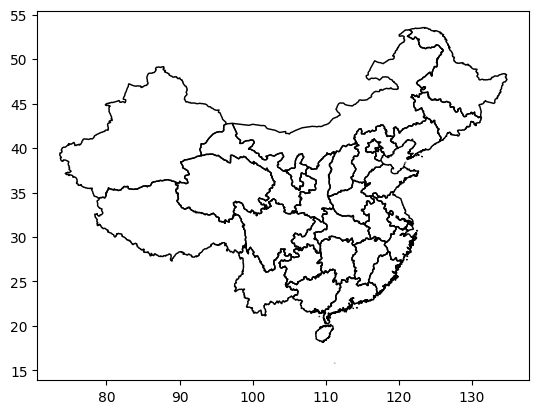

In [21]:
# China
base_CN = China.plot(color='white', edgecolor='lightgrey')
China.plot(ax=base_CN, color='None', edgecolor='black');
# world.plot(ax=base, color='None', edgecolor='black');

In [ ]:
# 3. generate India tif

In [22]:
India = world[world['admin'] == 'India']
#India

In [23]:
sel_in = world.intersects(China.geometry.iloc[0])
#sel_in

In [24]:
India_height = world[sel_in]
#India_height

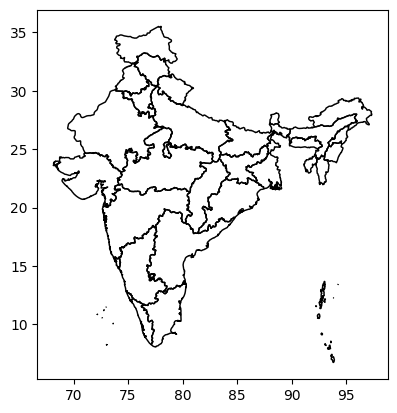

In [25]:
# India
base_in = India.plot(color='white', edgecolor='lightgrey')
India.plot(ax=base_in, color='None', edgecolor='black');

In [26]:
type(base_in)

matplotlib.axes._axes.Axes

In [ ]:
# 4. generate Japan tif

In [27]:
Japan = world[world['admin'] == 'Japan']

In [28]:
sel_JP = world.intersects(Japan.geometry.iloc[0])

In [29]:
Japan_height = world[sel_JP]

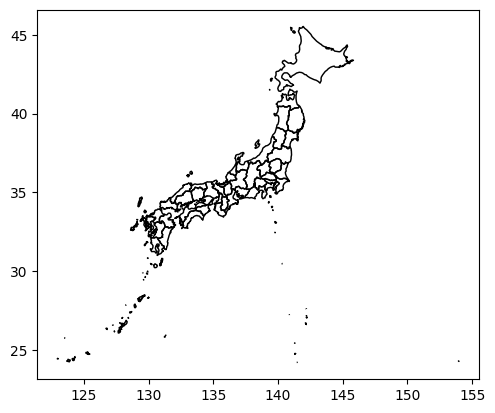

In [30]:
# Japan
base_JP = Japan.plot(color='white', edgecolor='lightgrey')
Japan.plot(ax=base_JP, color='None', edgecolor='black');

<Axes: >

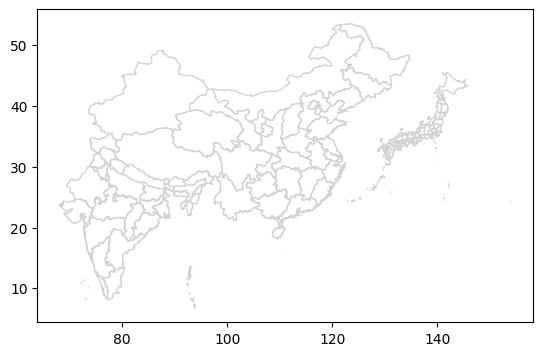

In [31]:
# merge rasters
joined = pd.concat([China.geometry, India.geometry, Japan.geometry])
joined.plot(color='white', edgecolor='lightgrey')
#out_image, out_transform = rasterio.merge.merge([China, India])

In [ ]:
# Elevation map using iris cubes and .nc file

In [32]:
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import numpy as np
import cartopy

In [68]:
import iris

elev = iris.load_cube('elev.0.5-deg.nc')
elev = iris.util.squeeze(elev)
asia = iris.Constraint(longitude=lambda v: 50.0 <= v <= 150.,
                         latitude=lambda v: 5. <= v <= 65.)
elev = elev.extract(asia)

/usr/local/lib/python3.11/dist-packages/iris/fileformats/_nc_load_rules/actions.py:112: _WarnComboIgnoringCfLoad: Ignoring invalid units 'meters, from 5-min data' on netCDF variable 'data'.
  hh.build_cube_metadata(engine)


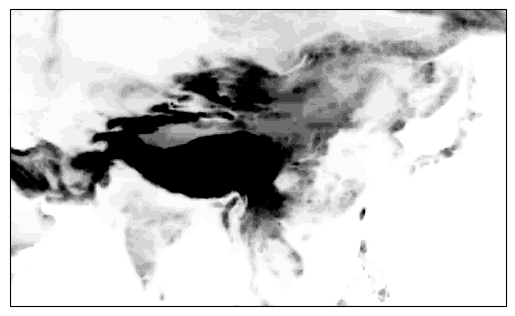

In [70]:
cmap = mpl_cm.get_cmap('Greys')
levels = np.arange(0,2000,150)
extend = 'max'

ax = plt.axes(projection=cartopy.crs.PlateCarree())
plt.contourf(elev.coord('longitude').points, elev.coord('latitude').points,
             elev.data, cmap=cmap, levels=levels, extend=extend)

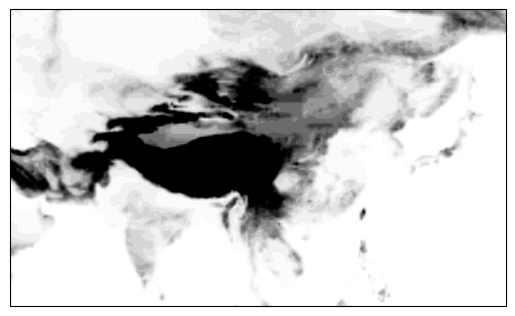

In [71]:
import iris.plot as iplt
iplt.contourf(elev, cmap=cmap, levels=levels, extend=extend)

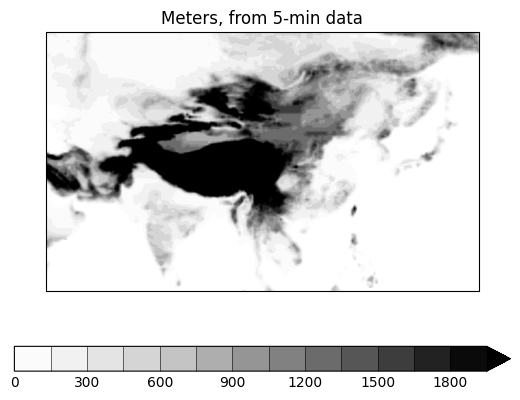

In [72]:
import iris.quickplot as qplt
qplt.contourf(elev, cmap=cmap, levels=levels, extend=extend)

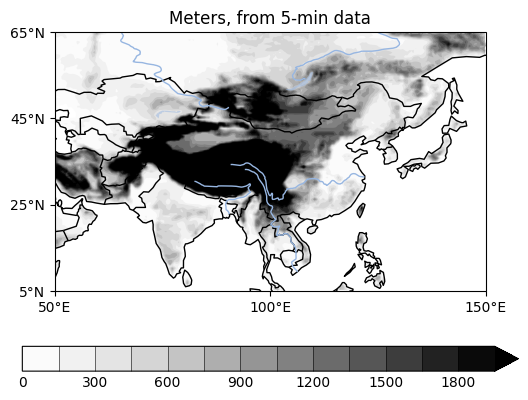

In [73]:
# china 35.8617° N, 104.1954° E
# India 20.5937° N, 78.9629° E
# Japan 36.2048° N, 138.2529° E
# Sri lanka 7.8731° N, 80.7718° E

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

qplt.contourf(elev, cmap=cmap, levels=levels, extend=extend)
ax = plt.gca()

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)


ax.set_xticks([50, 100, 150])
ax.set_yticks([5, 25, 45, 65])
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)